Tasks:
1. Fit a linear model and interpret the regression coefficients
2. Fit a tree-based model and interpret the nodes
3. Use auto ml to find the best model
4. Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare
them with the other model interpretability methods.

---

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [4]:
#importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/sainikhilreddychalla/DataScience-Engineering-Methods/main/Hotel_Reservations.csv")

In [5]:
# Let's see the head of our dataset
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Let's check the dimensions of the dataframe
df.shape

(36275, 19)

In [7]:
# let's look at the statistical aspects of the dataframe
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [9]:
#dropping Booking_ID column as it has unique values
df.drop(labels= ['Booking_ID'], axis= 1, inplace= True)

In [10]:
# Replacing values in the 'booking_status' column with 0 and 1
df['booking_status'].replace({'Not_Canceled': 0, 'Canceled': 1}, inplace=True)

In [11]:
# Get the counts of unique values in the 'type_of_meal_plan' column
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [12]:
# Get the counts of unique values in the 'room_type_reserved' column
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [13]:
# Get the counts of unique values in the 'market_segment_type' column
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [14]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']])

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [16]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

Now we can see that we have all variables as numeric.

In [18]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
required_car_parking_space              0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
type_of_meal_plan_Meal Plan 1           0.0
type_of_meal_plan_Meal Plan 2           0.0
type_of_meal_plan_Meal Plan 3           0.0
type_of_meal_plan_Not Selected          0.0
room_type_reserved_Room_Type 1          0.0
room_type_reserved_Room_Type 2          0.0
room_type_reserved_Room_Type 3          0.0
room_type_reserved_Room_Type 4  

#### Test-Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Putting feature variable to X
X = df.drop(['booking_status'], axis=1)

X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
# Putting response variable to y
y = df['booking_status']

y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [22]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Select only numeric columns
numeric_columns = X_train.select_dtypes(include=['int', 'float']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

#scaling train set
# Fit and transform the numeric columns
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])


In [25]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
16467,0.299784,-0.263761,-0.929383,-0.143310,-0.176604,-0.958788,0.463541,0.192682,1.189112,-0.164372,...,0,0,0,0,0,0,0,0,0,1
24739,-1.625874,-0.263761,-0.929383,0.569926,-0.176604,-0.139379,-2.157307,1.168919,0.960314,-0.164372,...,0,0,0,0,0,0,0,0,1,0
5621,0.299784,4.710188,-0.929383,-0.143310,-0.176604,-0.549084,0.463541,-1.434381,0.845915,-0.164372,...,0,0,0,1,0,0,0,0,0,1
8939,-1.625874,-0.263761,-0.929383,-0.856547,-0.176604,-0.666142,0.463541,-1.759793,-1.327669,-0.164372,...,0,0,0,0,0,0,0,0,0,1
78,2.225443,-0.263761,1.366452,1.996399,-0.176604,0.820500,0.463541,-0.458143,1.417910,-0.164372,...,0,1,0,0,0,0,0,0,0,1


In [26]:
# Iterate over columns and convert boolean columns to integer
for col in X_train.columns:
    if X_train[col].dtype == bool:
        X_train[col] = X_train[col].astype(int)

# checking info
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 16467 to 14147
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          25392 non-null  float64
 1   no_of_children                        25392 non-null  float64
 2   no_of_weekend_nights                  25392 non-null  float64
 3   no_of_week_nights                     25392 non-null  float64
 4   required_car_parking_space            25392 non-null  float64
 5   lead_time                             25392 non-null  float64
 6   arrival_year                          25392 non-null  float64
 7   arrival_month                         25392 non-null  float64
 8   arrival_date                          25392 non-null  float64
 9   repeated_guest                        25392 non-null  float64
 10  no_of_previous_cancellations          25392 non-null  float64
 11  no_of_previ

In [27]:
#scaling test set
# We wont use Fit and transform for test set as it causes data leakage
# We only use transform
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [28]:
# Iterate over columns and convert boolean columns to integer
for col in X_test.columns:
    if X_test[col].dtype == bool:
        X_test[col] = X_test[col].astype(int)

# checking info
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 23651 to 14427
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          10883 non-null  float64
 1   no_of_children                        10883 non-null  float64
 2   no_of_weekend_nights                  10883 non-null  float64
 3   no_of_week_nights                     10883 non-null  float64
 4   required_car_parking_space            10883 non-null  float64
 5   lead_time                             10883 non-null  float64
 6   arrival_year                          10883 non-null  float64
 7   arrival_month                         10883 non-null  float64
 8   arrival_date                          10883 non-null  float64
 9   repeated_guest                        10883 non-null  float64
 10  no_of_previous_cancellations          10883 non-null  float64
 11  no_of_previ

In [29]:
### Checking the hotel reservation cancellation rate
cancelled = (sum(df['booking_status'])/len(df['booking_status'].index))*100
cancelled

32.76361130254997

We have almost 32.76% cancellation rate

### Task 1

Fit a linear model and interpret the regression coefficients

#### Running Base Training Model

In [30]:
import statsmodels.api as sm

In [31]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                            GLM   Df Residuals:                    25364
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 19 Mar 2024   Deviance:                   4.6604e+05
Time:                        02:07:30   Pearson chi2:                 2.28e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 6.141e+19   5.71e+13   1.08e+06      0.000    6.14e+19    6.14e+19
no_of_adults                         -2.429e+12   3.54e+05  -6.87e+06      0.000   -2.43e+12   -2.43e+12
no_of_children                         1.13e+14   5.82e+05   1.94e+08      0.000    1.13e+14    1.13e+14
no_of_weekend_nights                  2.122e+14   3.28e+05   6.46e+08      0.000    2.12e+14    2.12e+14
no_of_week_nights                     2.819e+13   3.97e+05    7.1e+07      0.000    2.82e+13    2.82e+13
required_car_parking_space           -2.647e+14   4.22e+05  -6.27e+08      0.000   -2.65e+14   -2.65e+14
lead_time                             1.247e+15   3.78e+05    3.3e+09      0.000    1.25e+15    1.25e+15
arrival_year                          1.306e+14    4.6e+05   2.84e+08      0.000    1.31e+14    1.31e+14
arrival_month                        -2.407e+14   2.04e+05  -1.18e+09      0.000   -2.41e+14   -2.41e+14
arrival_date                         -1.686e+13   3.06e+05  -5.51e+07      0.000   -1.69e+13   -1.69e+13
repeated_guest                         -2.5e+13   5.25e+05  -4.76e+07      0.000    -2.5e+13    -2.5e+13
no_of_previous_cancellations            9.1e+12   4.89e+05   1.86e+07      0.000     9.1e+12     9.1e+12
no_of_previous_bookings_not_canceled  2.162e+13   5.36e+05   4.03e+07      0.000    2.16e+13    2.16e+13
avg_price_per_room                     6.06e+14    3.4e+05   1.78e+09      0.000    6.06e+14    6.06e+14
no_of_special_requests               -9.981e+14   3.24e+05  -3.08e+09      0.000   -9.98e+14   -9.98e+14
type_of_meal_plan_Meal Plan 1         -4.27e+19   3.97e+13  -1.08e+06      0.000   -4.27e+19   -4.27e+19
type_of_meal_plan_Meal Plan 2         -4.27e+19   3.97e+13  -1.08e+06      0.000   -4.27e+19   -4.27e+19
type_of_meal_plan_Meal Plan 3         -4.27e+19   3.97e+13  -1.08e+06      0.000   -4.27e+19   -4.27e+19
type_of_meal_plan_Not Selected        -4.27e+19   3.97e+13  -1.08e+06      0.000   -4.27e+19   -4.27e+19
room_type_reserved_Room_Type 1       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
room_type_reserved_Room_Type 2       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
room_type_reserved_Room_Type 3       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
room_type_reserved_Room_Type 4       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
room_type_reserved_Room_Type 5       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
room_type_reserved_Room_Type 6       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
room_type_reserved_Room_Type 7       -2.373e+19   2.21e+13  -1.08e+06      0.000   -2.37e+19   -2.37e+19
market_segment_type_Aviation          

#### Feature Selection Using RFE

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [34]:
rfe.support_

array([False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True])

In [35]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('no_of_adults', False, 15),
 ('no_of_children', False, 14),
 ('no_of_weekend_nights', False, 8),
 ('no_of_week_nights', False, 10),
 ('required_car_parking_space', True, 1),
 ('lead_time', True, 1),
 ('arrival_year', False, 4),
 ('arrival_month', False, 9),
 ('arrival_date', False, 16),
 ('repeated_guest', True, 1),
 ('no_of_previous_cancellations', False, 12),
 ('no_of_previous_bookings_not_canceled', False, 11),
 ('avg_price_per_room', True, 1),
 ('no_of_special_requests', True, 1),
 ('type_of_meal_plan_Meal Plan 1', True, 1),
 ('type_of_meal_plan_Meal Plan 2', False, 2),
 ('type_of_meal_plan_Meal Plan 3', True, 1),
 ('type_of_meal_plan_Not Selected', False, 3),
 ('room_type_reserved_Room_Type 1', True, 1),
 ('room_type_reserved_Room_Type 2', True, 1),
 ('room_type_reserved_Room_Type 3', False, 13),
 ('room_type_reserved_Room_Type 4', True, 1),
 ('room_type_reserved_Room_Type 5', False, 6),
 ('room_type_reserved_Room_Type 6', False, 7),
 ('room_type_reserved_Room_Type 7', True, 1),

In [36]:
col = X_train.columns[rfe.support_]

In [37]:
X_train.columns[~rfe.support_]

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'arrival_year', 'arrival_month', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate'],
      dtype='object')

In [38]:
col

Index(['required_car_parking_space', 'lead_time', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 3',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

##### Assessing the model with StatsModels

In [39]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                            GLM   Df Residuals:                    25376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10872.
Date:                Tue, 19 Mar 2024   Deviance:                       21743.
Time:                        02:07:41   Pearson chi2:                 2.44e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3345
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.9542      0.142    -13.795      0.000      -2.232      -1.677
required_car_parking_space           -0.2577      0.024    -10.934      0.000      -0.304      -0.212
lead_time                             1.3709      0.021     64.095      0.000       1.329       1.413
repeated_guest                       -0.3378      0.064     -5.271      0.000      -0.463      -0.212
avg_price_per_room                    0.6451      0.023     27.978      0.000       0.600       0.690
no_of_special_requests               -1.1677      0.023    -50.113      0.000      -1.213      -1.122
type_of_meal_plan_Meal Plan 1        -0.1458      0.041     -3.586      0.000      -0.225      -0.066
type_of_meal_plan_Meal Plan 3        21.4897   2.52e+04      0.001      0.999   -4.94e+04    4.94e+04
room_type_reserved_Room_Type 1        0.5945      0.102      5.826      0.000       0.394       0.794
room_type_reserved_Room_Type 2        0.3162      0.160      1.976      0.048       0.003       0.630
room_type_reserved_Room_Type 4        0.4236      0.100      4.225      0.000       0.227       0.620
room_type_reserved_Room_Type 7       -0.6585      0.316     -2.087      0.037      -1.277      -0.040
market_segment_type_Aviation          0.9511      0.273      3.490      0.000       0.417       1.485
market_segment_type_Complementary   -36.5528   3.56e+04     -0.001      0.999   -6.99e+04    6.98e+04
market_segment_type_Offline          -0.9397      0.104     -9.057      0.000      -1.143      -0.736
market_segment_type_Online            1.0316      0.099     10.463      0.000       0.838       1.225
=====================================================================================================
"""

#### Checking VIFs

VIF values greater than a certain threshold (usually 5 or 10) indicate multicollinearity between the independent variables. Higher VIF values indicate stronger multicollinearity.

In [40]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,room_type_reserved_Room_Type 1,13.34
14,market_segment_type_Online,10.97
13,market_segment_type_Offline,5.51
5,type_of_meal_plan_Meal Plan 1,4.02
9,room_type_reserved_Room_Type 4,3.71
3,avg_price_per_room,1.57
8,room_type_reserved_Room_Type 2,1.38
2,repeated_guest,1.24
12,market_segment_type_Complementary,1.22
4,no_of_special_requests,1.19


There are a few variables with high VIF. It's best to drop these variables. The variable 'type_of_meal_plan_Meal Plan 1' has the highest VIF. So let's start by dropping that.

In [42]:
col = col.drop('type_of_meal_plan_Meal Plan 1', 1)
col

Index(['required_car_parking_space', 'lead_time', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 3', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [43]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                            GLM   Df Residuals:                    25377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10878.
Date:                Tue, 19 Mar 2024   Deviance:                       21756.
Time:                        02:07:42   Pearson chi2:                 2.43e+04
No. Iterations:                    26   Pseudo R-squ. (CS):             0.3341
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.1340      0.132    -16.106      0.000      -2.394      -1.874
required_car_parking_space           -0.2584      0.024    -10.973      0.000      -0.305      -0.212
lead_time                             1.3689      0.021     64.180      0.000       1.327       1.411
repeated_guest                       -0.3380      0.064     -5.269      0.000      -0.464      -0.212
avg_price_per_room                    0.6474      0.023     28.104      0.000       0.602       0.693
no_of_special_requests               -1.1694      0.023    -50.225      0.000      -1.215      -1.124
type_of_meal_plan_Meal Plan 3        21.5790   2.51e+04      0.001      0.999   -4.92e+04    4.93e+04
room_type_reserved_Room_Type 1        0.6332      0.101      6.240      0.000       0.434       0.832
room_type_reserved_Room_Type 2        0.3175      0.160      1.984      0.047       0.004       0.631
room_type_reserved_Room_Type 4        0.4211      0.100      4.200      0.000       0.225       0.618
room_type_reserved_Room_Type 7       -0.6747      0.316     -2.138      0.033      -1.293      -0.056
market_segment_type_Aviation          0.9605      0.273      3.525      0.000       0.426       1.495
market_segment_type_Complementary   -36.4362   3.55e+04     -0.001      0.999   -6.97e+04    6.96e+04
market_segment_type_Offline          -0.9016      0.103     -8.743      0.000      -1.104      -0.699
market_segment_type_Online            1.0752      0.098     10.990      0.000       0.883       1.267
=====================================================================================================
"""

##### Let's check the VIFs again

In [44]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,room_type_reserved_Room_Type 1,12.33
13,market_segment_type_Online,10.82
12,market_segment_type_Offline,5.39
8,room_type_reserved_Room_Type 4,3.28
3,avg_price_per_room,1.56
7,room_type_reserved_Room_Type 2,1.33
2,repeated_guest,1.22
11,market_segment_type_Complementary,1.21
4,no_of_special_requests,1.19
1,lead_time,1.12


VIF values are fine now

In [45]:
# Let's drop market_segment_type_Complementary since it has a high P value
col = col.drop('market_segment_type_Complementary')
col

Index(['required_car_parking_space', 'lead_time', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 3', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [46]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                            GLM   Df Residuals:                    25378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10886.
Date:                Tue, 19 Mar 2024   Deviance:                       21772.
Time:                        02:07:43   Pearson chi2:                 2.43e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3337
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1864      0.132    -16.571      0.000      -2.445      -1.928
required_car_parking_space        -0.2585      0.024    -10.980      0.000      -0.305      -0.212
lead_time                          1.3675      0.021     64.200      0.000       1.326       1.409
repeated_guest                    -0.3354      0.064     -5.227      0.000      -0.461      -0.210
avg_price_per_room                 0.6523      0.023     28.444      0.000       0.607       0.697
no_of_special_requests            -1.1699      0.023    -50.266      0.000      -1.216      -1.124
type_of_meal_plan_Meal Plan 3      3.3856      3.459      0.979      0.328      -3.395      10.166
room_type_reserved_Room_Type 1     0.6419      0.101      6.332      0.000       0.443       0.841
room_type_reserved_Room_Type 2     0.3268      0.160      2.043      0.041       0.013       0.640
room_type_reserved_Room_Type 4     0.4261      0.100      4.252      0.000       0.230       0.623
room_type_reserved_Room_Type 7    -0.6867      0.316     -2.176      0.030      -1.305      -0.068
market_segment_type_Aviation       1.0047      0.272      3.688      0.000       0.471       1.539
market_segment_type_Offline       -0.8554      0.103     -8.305      0.000      -1.057      -0.654
market_segment_type_Online         1.1190      0.098     11.450      0.000       0.927       1.311
==================================================================================================
"""

In [47]:
# Let's drop type_of_meal_plan_Meal Plan 3 since it has a high P value
col = col.drop('type_of_meal_plan_Meal Plan 3')
col

Index(['required_car_parking_space', 'lead_time', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Aviation', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [48]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:         booking_status   No. Observations:                25392
Model:                            GLM   Df Residuals:                    25379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10887.
Date:                Tue, 19 Mar 2024   Deviance:                       21774.
Time:                        02:07:43   Pearson chi2:                 2.43e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3337
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.1874      0.132    -16.577      0.000      -2.446      -1.929
required_car_parking_space        -0.2586      0.024    -10.982      0.000      -0.305      -0.212
lead_time                          1.3673      0.021     64.197      0.000       1.326       1.409
repeated_guest                    -0.3353      0.064     -5.226      0.000      -0.461      -0.210
avg_price_per_room                 0.6530      0.023     28.475      0.000       0.608       0.698
no_of_special_requests            -1.1699      0.023    -50.268      0.000      -1.216      -1.124
room_type_reserved_Room_Type 1     0.6434      0.101      6.348      0.000       0.445       0.842
room_type_reserved_Room_Type 2     0.3285      0.160      2.054      0.040       0.015       0.642
room_type_reserved_Room_Type 4     0.4271      0.100      4.261      0.000       0.231       0.624
room_type_reserved_Room_Type 7    -0.6835      0.316     -2.165      0.030      -1.302      -0.065
market_segment_type_Aviation       1.0042      0.272      3.686      0.000       0.470       1.538
market_segment_type_Offline       -0.8550      0.103     -8.302      0.000      -1.057      -0.653
market_segment_type_Online         1.1184      0.098     11.445      0.000       0.927       1.310
==================================================================================================
"""

This will be our final Linear Model as all P values are optimal (<0.05) and VIF values are also optimal (<5)

####  Interpretation of the regression coefficients

1. **Intercept (const)**: -1.5539
   - This is the baseline log odds of a booking being canceled when all other factors are zero.

2. **required_car_parking_space**: -0.2585
   - For every additional car parking space needed, the log odds of the booking being canceled decrease by approximately 0.2585, meaning it's less likely for the booking to be canceled.

3. **lead_time**: 1.3777
   - The longer the lead time (time between booking and arrival), the log odds of the booking being canceled increase by approximately 1.3777, indicating a higher likelihood of cancellation.

4. **repeated_guest**: -0.3343
   - Being a repeated guest decreases the log odds of the booking being canceled by approximately 0.3343, meaning repeat guests are less likely to cancel their bookings.

5. **avg_price_per_room**: 0.6475
   - For every increase in the average price per room, the log odds of the booking being canceled increase by approximately 0.6475, indicating a higher likelihood of cancellation for more expensive bookings.

6. **no_of_special_requests**: -1.1659
   - More special requests decrease the log odds of the booking being canceled by approximately 1.1659, meaning bookings with more special requests are less likely to be canceled.

7. **type_of_meal_plan_Not Selected**: 0.2772
   - Not selecting a meal plan increases the log odds of the booking being canceled by approximately 0.2772, indicating a higher likelihood of cancellation.

8. **room_type_reserved_Room_Type 5/6/7**: -0.6018, -0.5074, -1.1882
   - Each of these coefficients represents how different room types affect the log odds of booking cancellation compared to a reference room type.

9. **market_segment_type_Aviation/Offline/Online**: 0.9351, -0.8646, 1.0055
   - Each of these coefficients represents how different market segments affect the log odds of booking cancellation compared to a reference market segment type.


**lead_time is the most important predictor as per this model**

### Task 2

Fit a tree-based model and interpret the nodes

#### Using Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=10, random_state=100, oob_score=True)

In [51]:
%%time
rf.fit(X_train, y_train)

CPU times: user 146 ms, sys: 0 ns, total: 146 ms
Wall time: 147 ms


RandomForestClassifier(max_depth=4, max_features=10, n_estimators=10,
                       oob_score=True, random_state=100)

In [52]:
#checking oob score
rf.oob_score_

0.7930056710775047

In [53]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

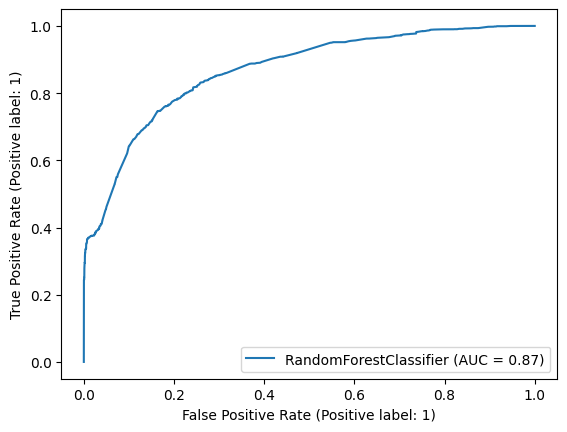

In [54]:
#looking at ROC curve
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [55]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [56]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
#using gridsearchCV for finding best hyper-parameters set
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [59]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 4.41 s, sys: 523 ms, total: 4.93 s
Wall time: 2min 18s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [60]:
#checking oob score of best hyper-parameter set
grid_search.best_score_

0.8814193446754883

In [61]:
#fitting a randomforest with best hyper-parameter set obtained from gridsearchV
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

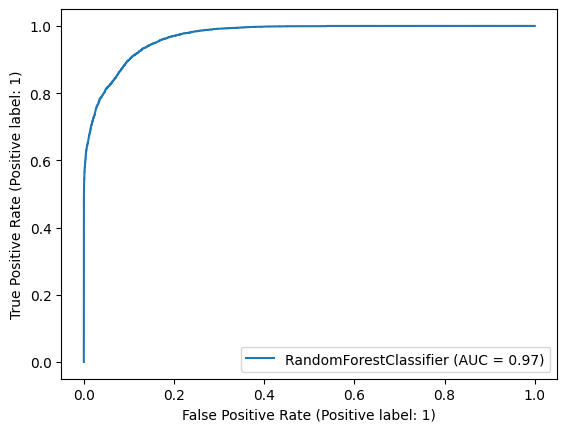

In [62]:
#looking at ROC curve
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [63]:
#retrieveing importances of features according to model
rf_best.feature_importances_

array([2.10579052e-02, 4.85130774e-03, 2.65781215e-02, 3.23076169e-02,
       6.14831650e-03, 3.57318441e-01, 3.75380042e-02, 6.98210208e-02,
       4.86032920e-02, 3.24834353e-03, 2.07051873e-04, 2.35842860e-03,
       1.32232880e-01, 1.46628731e-01, 7.55397751e-03, 1.13701202e-02,
       0.00000000e+00, 5.26640841e-03, 5.72022377e-03, 9.23103956e-04,
       0.00000000e+00, 4.25631620e-03, 1.25656153e-03, 1.66459972e-03,
       1.18074920e-04, 3.33661586e-04, 6.58876543e-04, 7.10634091e-03,
       2.22622392e-02, 4.26100347e-02])

In [64]:
# Creating DataFrame to store feature importances
imp_df = pd.DataFrame({
    # Column names of the training data
    "Varname": X_train.columns,
    # Feature importances calculated from the Random Forest model
    "Imp": rf_best.feature_importances_
})

In [65]:
# viewing the DataFrame by feature importance in descending order
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,lead_time,0.357318
13,no_of_special_requests,0.146629
12,avg_price_per_room,0.132233
7,arrival_month,0.069821
8,arrival_date,0.048603
29,market_segment_type_Online,0.042610
6,arrival_year,0.037538
3,no_of_week_nights,0.032308
2,no_of_weekend_nights,0.026578
28,market_segment_type_Offline,0.022262


**Lead_time is the most important predictor according to this Random Forest model, similar to our previous linear model.**

### Task 3

Use auto ml to find the best model

In [66]:
! pip install h2o
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2ORandomForestEstimator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 4.7 MB/s eta 0:00:00


In [67]:
# Settings for the number of threads and maximum memory
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9jx5lia1
  JVM stdout: /tmp/tmp9jx5lia1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9jx5lia1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,5 days
H2O_cluster_name:,H2O_from_python_unknownUser_uoda51
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


#### Importing Data
Once H2O is initialized, in the below code we are importing the data into a h2o dataframe.

In [68]:
#importing the dataset
df_1 = pd.read_csv("https://raw.githubusercontent.com/sainikhilreddychalla/DataScience-Engineering-Methods/main/Hotel_Reservations.csv")

In [69]:
data = h2o.H2OFrame(df_1)
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65,0,Not_Canceled
INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60,0,Canceled
INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100,0,Canceled
INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.5,0,Canceled
INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115,1,Canceled
INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.9,1,Not_Canceled
INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


#### Studying Data

In [70]:
data.describe()

Rows:36275
Cols:19

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
type,string,int,int,int,int,enum,int,enum,int,int,int,int,enum,int,int,int,real,int,enum
mins,NaN,0.0,0.0,0.0,0.0,,0.0,,0.0,2017.0,1.0,1.0,,0.0,0.0,0.0,0.0,0.0,
mean,NaN,1.844962095106814,0.10527911784975859,0.8107236388697423,2.2043004824259103,,0.0309855272226051,,85.23255685733977,2017.8204272915116,7.4236526533425184,15.596995175740844,,0.02563749138525155,0.02334941419710546,0.15341144038594062,103.4235390764979,0.6196554100620265,
maxs,NaN,4.0,10.0,7.0,17.0,,1.0,,443.0,2018.0,12.0,31.0,,1.0,13.0,58.0,540.0,5.0,
sigma,NaN,0.5187148379012908,0.40264806358927735,0.870643614759999,1.4109048548240162,,0.17328084736891503,,85.93081669923292,0.38383643955901103,3.0698944112257633,8.740447368632918,,0.15805346903513284,0.3683314479197877,1.7541707114426393,35.08942403637024,0.7862358983956053,
zeros,0,139,33577,16872,2387,,35151,,1297,0,0,0,,35345,35937,35463,545,19777,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0.0,Room_Type 1,224.0,2017.0,10.0,2.0,Offline,0.0,0.0,0.0,65.0,0.0,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.0,0.0,Canceled


#### Splitting into training and testing sets

In [71]:
y = "booking_status"
x = data.columns

target=y

splits = data.split_frame(ratios=[0.75], seed=1)

train = splits[0]
test = splits[1]

print ("Rows in Train",train.nrow)
print ("Rows in Test",test.nrow)

Rows in Train 27291
Rows in Test 8984


#### H20 AutoML Execution
The max_runtime_secs argument provides a way to limit the AutoML run by time

In [72]:
# Set up AutoML
import time
aml = H2OAutoML(max_runtime_secs=60)

# set model start time and train the aml model
model_start_time = time.time()
aml.train(x=x,y=y,training_frame=data)

AutoML progress: |
02:10:32.287: _train param, Dropping bad and constant columns: [Booking_ID]

█████████████████
02:10:49.830: _train param, Dropping bad and constant columns: [Booking_ID]

████
02:10:53.749: _train param, Dropping bad and constant columns: [Booking_ID]

█████████████
02:11:05.437: _train param, Dropping unused columns: [Booking_ID]

███
02:11:08.660: _train param, Dropping bad and constant columns: [Booking_ID]

████
02:11:12.496: _train param, Dropping bad and constant columns: [Booking_ID]

█████
02:11:16.275: _train param, Dropping bad and constant columns: [Booking_ID]

███
02:11:19.865: _train param, Dropping bad and constant columns: [Booking_ID]

████
02:11:23.443: _train param, Dropping bad and constant columns: [Booking_ID]

████
02:11:27.29: _train param, Dropping unused columns: [Booking_ID]

██
02:11:28.977: _train param, Dropping unused columns: [Booking_ID]

███
02:11:32.160: _train param, Dropping bad and constant columns: [Booking_ID]

█| (done) 100%


key,value
Stacking strategy,blending
Number of base models (used / total),4/8
# GBM base models (used / total),3/4
# XGBoost base models (used / total),0/2
# DRF base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None


## Interpreting the above results

MAE: The mean absolute error (MAE) is the average absolute difference between the target values and the predicted values. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSE: The root-mean-square error metric is a frequently used measure of the differences between the values predicted by a model or an estimator and the values observed. This metric ranges from zero to infinity; a lower value indicates a higher quality model.

RMSLE: The root-mean-squared logarithmic error metric is similar to RMSE, except that it uses the natural logarithm of the predicted and actual values plus 1. RMSLE penalizes under-prediction more heavily than over-prediction. It can also be a good metric when you don't want to penalize differences for large prediction values more heavily than for small prediction values. This metric ranges from zero to infinity; a lower value indicates a higher quality model. The RMSLE evaluation metric is returned only if all label and predicted values are non-negative.

r^2: r squared (r^2) is the square of the Pearson correlation coefficient between the labels and predicted values. This metric ranges between zero and one; a higher value indicates a higher quality model.

MAPE: Mean absolute percentage error (MAPE) is the average absolute percentage difference between the labels and the predicted values. This metric ranges between zero and infinity; a lower value indicates a higher quality model.

K-fold cross-validation is used to validate a model internally, i.e., estimate the model performance without having to sacrifice a validation split.

Next, we will view the AutoML Leaderboard. Since we specified a leaderboard_frame in the h2o.automl() function for scoring and ranking the models, the AutoML leaderboard uses the performance on this data to rank the models.

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric. In the case of regression, the default ranking metric is mean residual deviance.

In [73]:
# printing the leaderBoard for models used
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_1_20240319_21031     0.955069   0.238522  0.977985                0.133363  0.272832  0.0744375
StackedEnsemble_BestOfFamily_2_AutoML_1_20240319_21031  0.954974   0.238882  0.977876                0.128786  0.272739  0.0743863
GBM_4_AutoML_1_20240319_21031                           0.953539   0.243191  0.977234                0.134216  0.274389  0.0752894
DRF_1_AutoML_1_20240319_21031                           0.952279   0.25435   0.975719                0.131859  0.275134  0.0756987
StackedEnsemble_BestOfFamily_1_AutoML_1_20240319_21031  0.95152    0.248567  0.976237                0.135093  0.278634  0.0776368
GBM_1_AutoML_1_20240319_21031                           0.951267   0.248685  0.976064                0.140007  0.278232  0.0774131
GBM_3_AutoML_1_20240319_21031                           0.951061   0.252601  0.9761

In [74]:
# predicting on test data
prediction = aml.leader.predict(test)
prediction.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,Canceled,Not_Canceled
Canceled,0.974661,0.0253393
Not_Canceled,0.0292096,0.97079
Not_Canceled,0.00608398,0.993916
Canceled,0.898808,0.101192
Canceled,0.918094,0.0819062
Not_Canceled,0.0542464,0.945754
Canceled,0.999297,0.000703224
Canceled,0.996946,0.00305388
Not_Canceled,0.000318897,0.999681
Not_Canceled,0.0477678,0.952232


In [75]:
# Finding & storing the best model
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])
best_model.algo

'stackedensemble'

In [76]:
# performance of the model
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.04984450751918533
RMSE: 0.22325883525447618
LogLoss: 0.17008213323923424
AUC: 0.9820000502151754
AUCPR: 0.9907663692609815
Gini: 0.9640001004303509
Null degrees of freedom: 8983
Residual degrees of freedom: 8979
Null deviance: 11375.839150106542
Residual deviance: 3056.0357700425607
AIC: 3066.0357700425607

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5252628977764509
              Canceled    Not_Canceled    Error    Rate
------------  ----------  --------------  -------  --------------
Canceled      2616        335             0.1135   (335.0/2951.0)
Not_Canceled  274         5759            0.0454   (274.0/6033.0)
Total         2890        6094            0.0678   (609.0/8984.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.525263     0.949781  217
max f2                       0.28154      0.970793  289
max f0point5                 0.762337     0.959607  141
max accuracy                 0.525263     0.932213  217
max precision                0.999799     1         0
max recall                   0.0147539    1         388
max specificity              0.999799     1         0
max absolute_mcc             0.525263     0.845628  217
max min_per_class_accuracy   0.653911     0.924913  178
max mean_per_class_accuracy  0.700843     0.927553  163
max tns                      0.999799     2951      0
max fns                      0.999799     5486      0
max fps                      0.000333147  2951      399
max tps                      0.0147539    6033      388
max tnr                      0.999799     1         0
max fnr                      0.999799     0.909332  0
max fpr                      0.000333147  1         399
max tpr                      0.0147539    1         388

Gains/Lift Table: Avg response rate: 67.15 %, avg score: 66.86 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100178                   0.999902           1.48914    1.48914            1                0.999933     1                           0.999933            0.014918        0.014918                   48.9143   48.9143            0.014918
2        0.0200356                   0.99986            1.48914    1.48914            1                0.999882     1                           0.999907            0.014918        0.0298359                  48.9143   48.9143            0.0298359
3        0.0307213                   0.999806           1.48914    1.48914            1                0.999827     1                           0.999879            0.0159125       0.0457484                  48.9143   48.9143            0.0457484
4        0.0401825                   0.999766           1.48914    1.48914            1                0.999787     1                           0.999857            0.0140892       0.0598376                  48.9143   48.9143            0.0598376
5        0.0503117                   0.999712           1.48914    1.48914            1                0.999739     1                           0.999834            0.0150837       0.0749213                  48.9143   48.9143            0.0749213
6        0.100067                    0.999465           1.48914    1.48914            1                0.999595     1                           0.999715            0.0740925       0.149014                   48.9143   48.9143            0.1

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20240319_21031,0.986835,0.158666,0.992682,0.0594954,0.205337,0.0421634,3720,0.012639,DRF
StackedEnsemble_BestOfFamily_2_AutoML_1_20240319_21031,0.982195,0.169533,0.990826,0.0787584,0.222187,0.0493672,1760,0.031685,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240319_21031,0.981712,0.17062,0.990604,0.078983,0.223487,0.0499465,2827,0.098631,StackedEnsemble
GBM_4_AutoML_1_20240319_21031,0.980685,0.178504,0.99009,0.0799301,0.227427,0.051723,3544,0.024898,GBM
GBM_1_AutoML_1_20240319_21031,0.97685,0.190349,0.988092,0.0903538,0.237162,0.056246,11576,0.047648,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20240319_21031,0.976006,0.190093,0.987691,0.0964673,0.238038,0.0566621,2914,0.062822,StackedEnsemble
GBM_3_AutoML_1_20240319_21031,0.972818,0.208968,0.98622,0.108423,0.249251,0.062126,3544,0.024727,GBM
XGBoost_2_AutoML_1_20240319_21031,0.965474,0.225109,0.98217,0.118556,0.2609,0.0680689,3789,0.003927,XGBoost
XGBoost_1_AutoML_1_20240319_21031,0.962027,0.236257,0.980308,0.123025,0.267106,0.0713457,17164,0.0036,XGBoost
GBM_2_AutoML_1_20240319_21031,0.959271,0.248708,0.979267,0.122687,0.274476,0.0753371,3546,0.020044,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240319_21031

,Canceled,Not_Canceled,Error,Rate
Canceled,10528.0,1357.0,0.1142,(1357.0/11885.0)
Not_Canceled,1068.0,23322.0,0.0438,(1068.0/24390.0)
Total,11596.0,24679.0,0.0669,(2425.0/36275.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

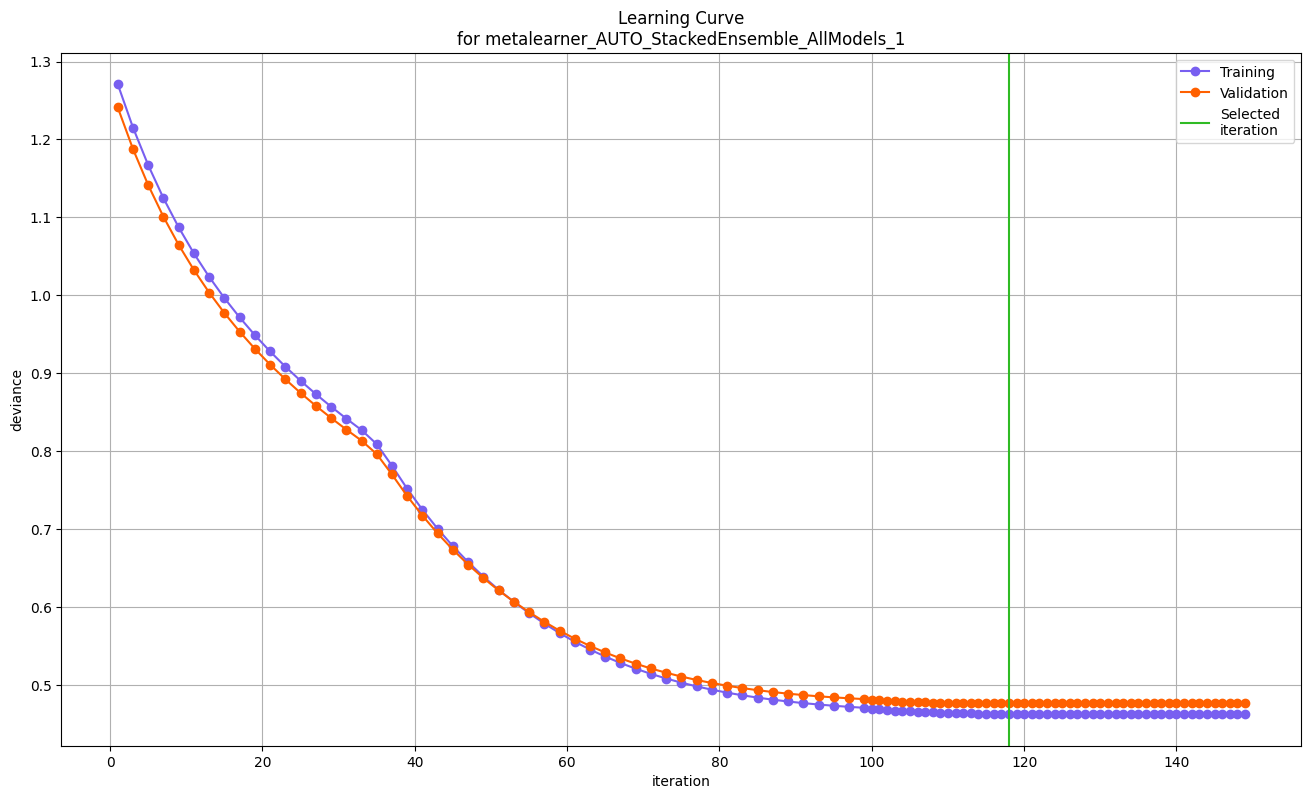

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

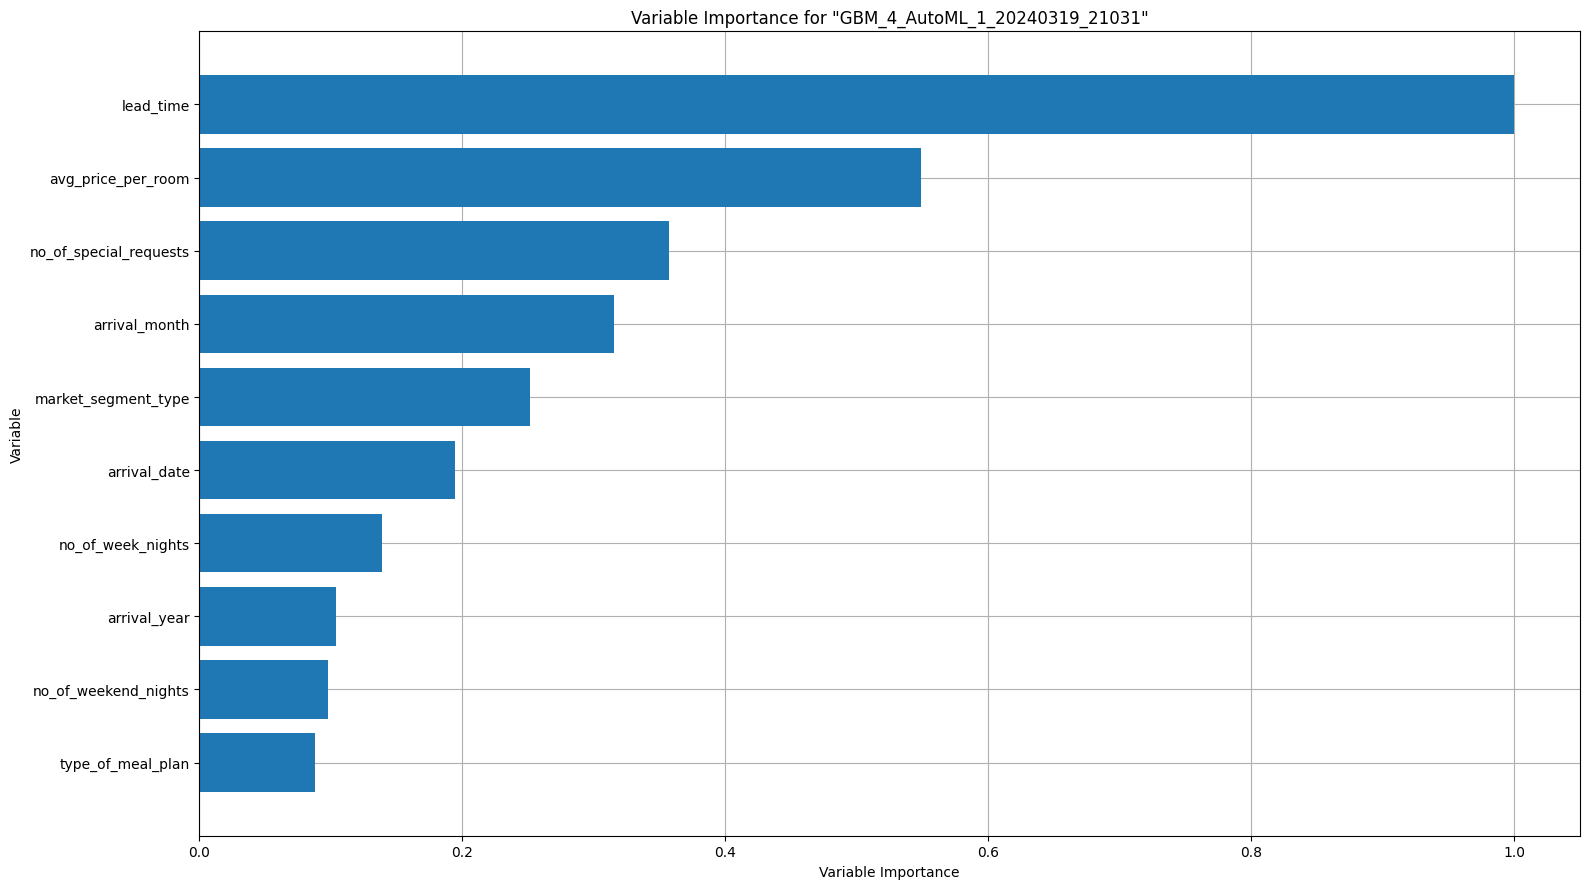

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

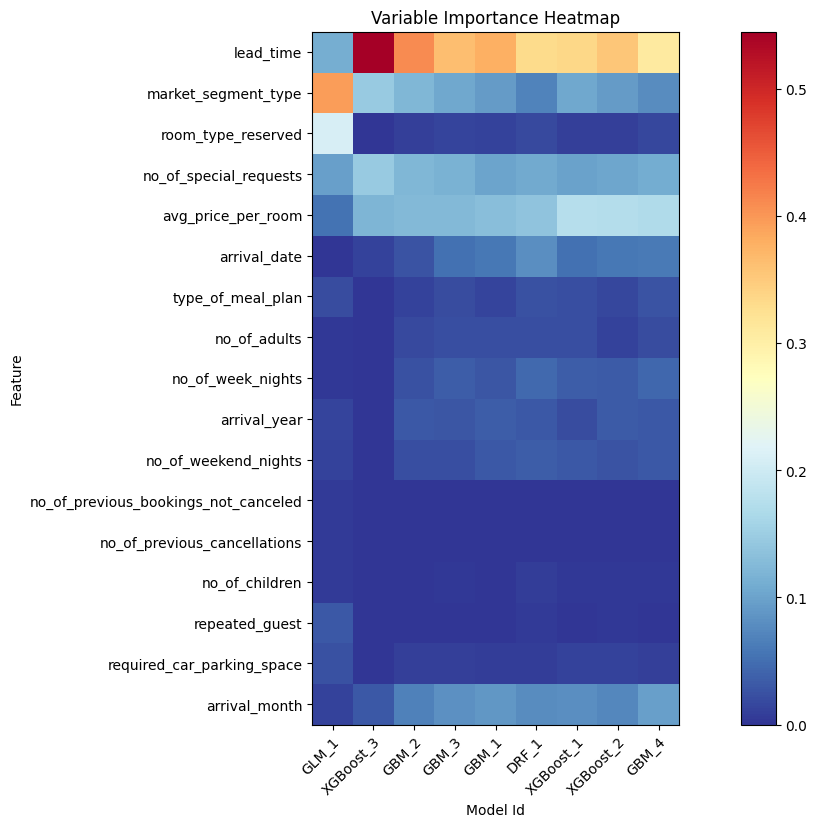

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

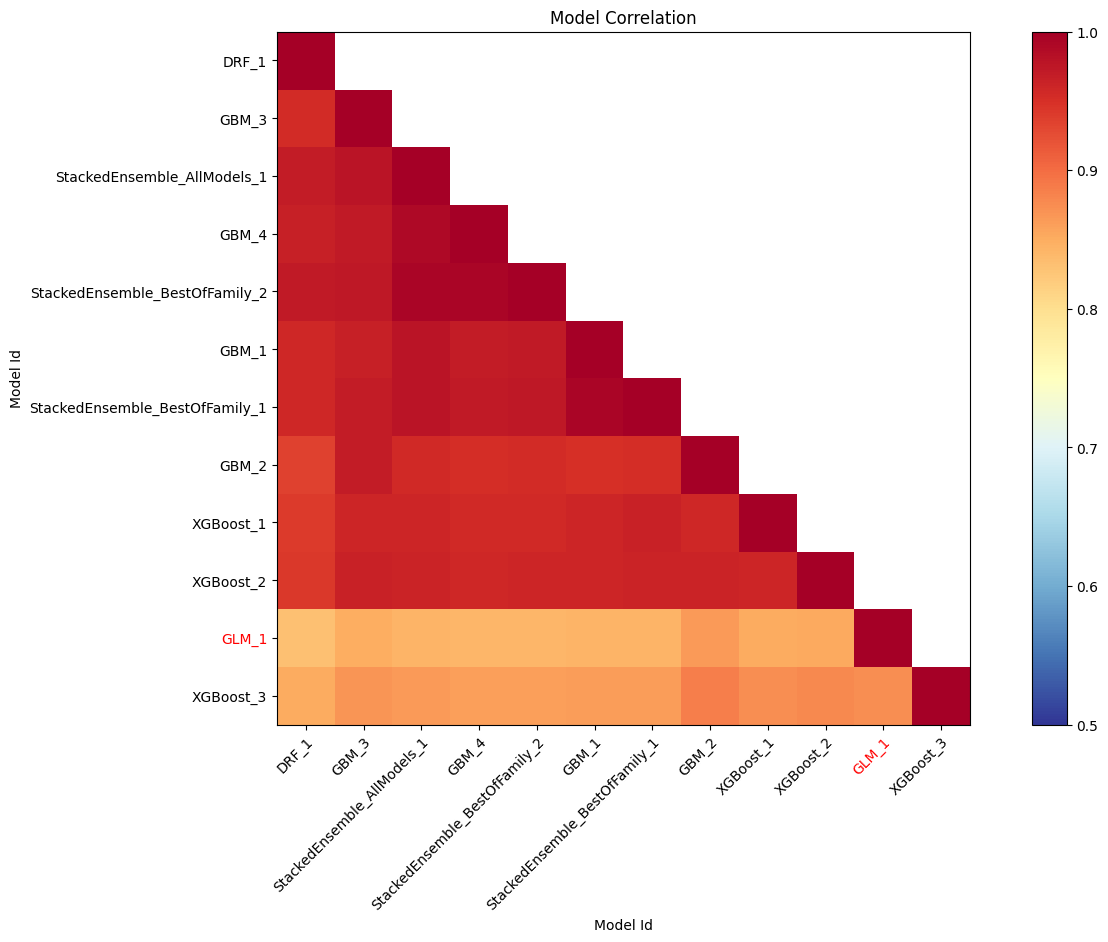

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

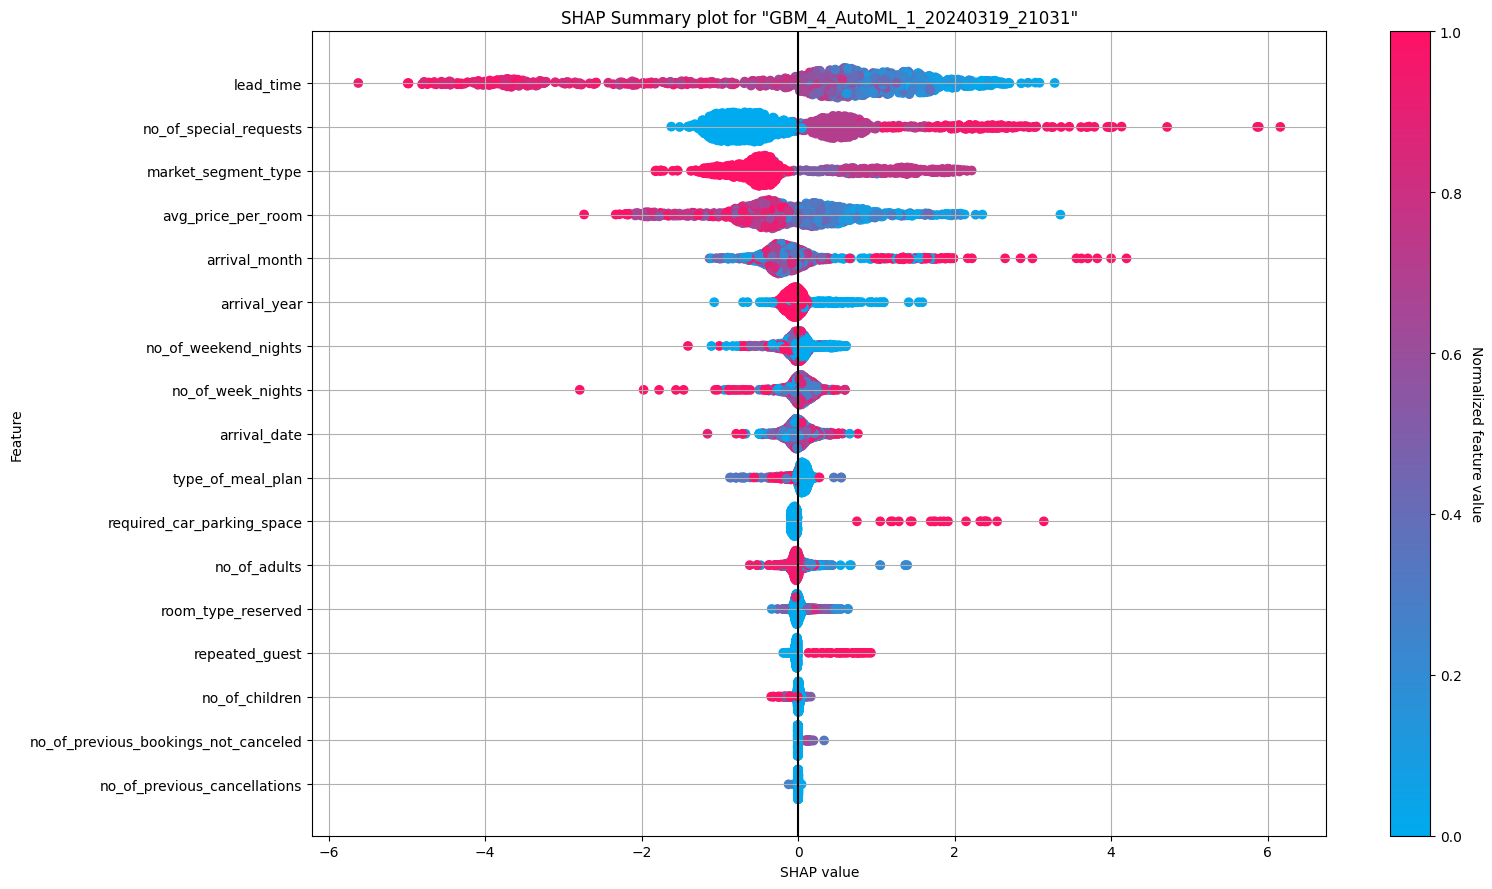

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

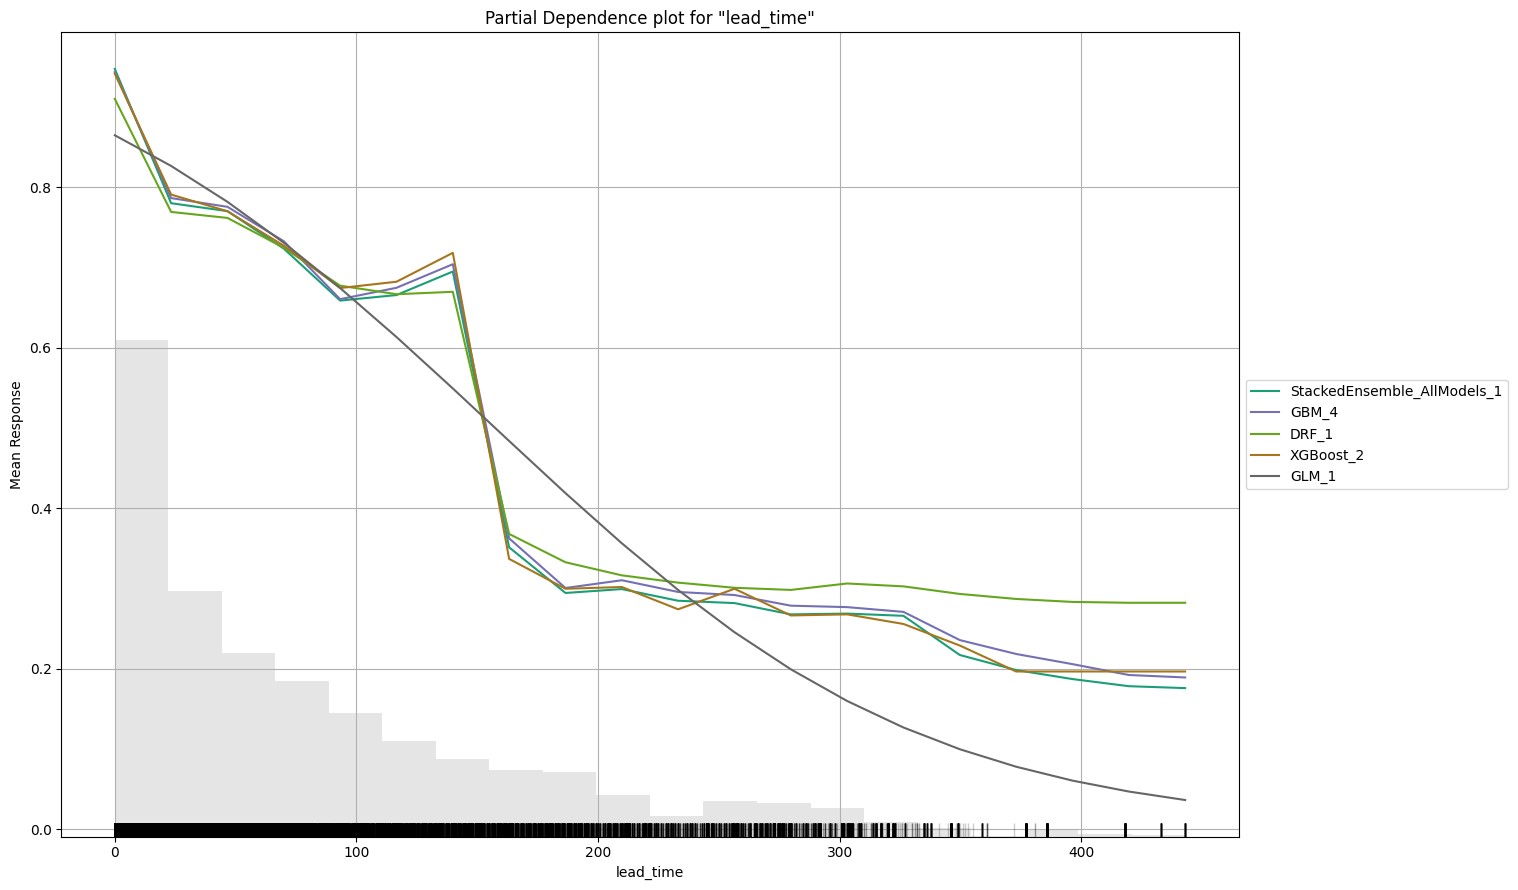

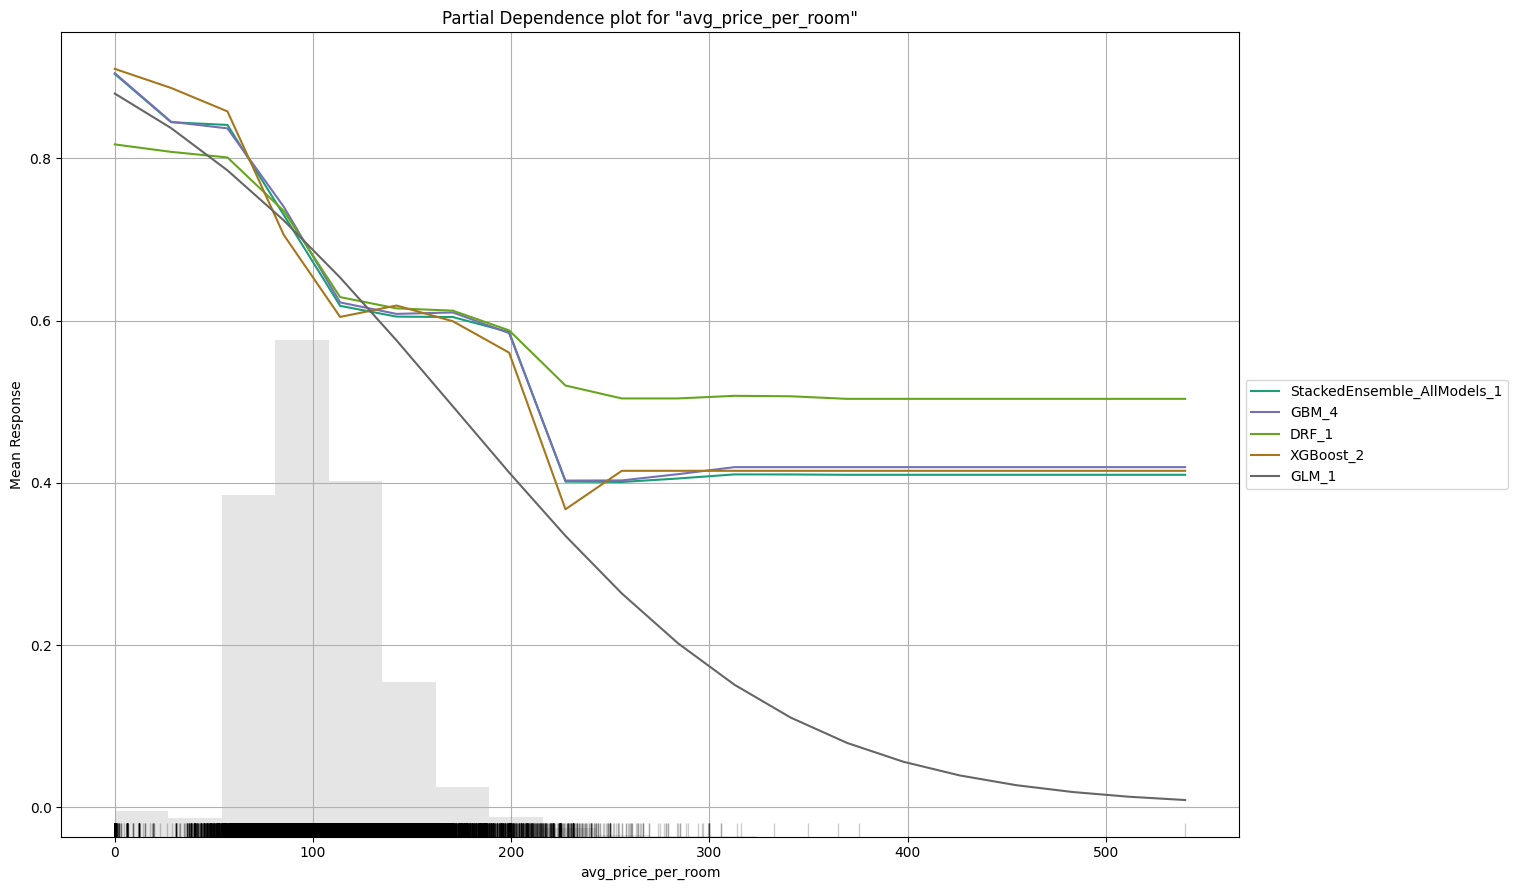

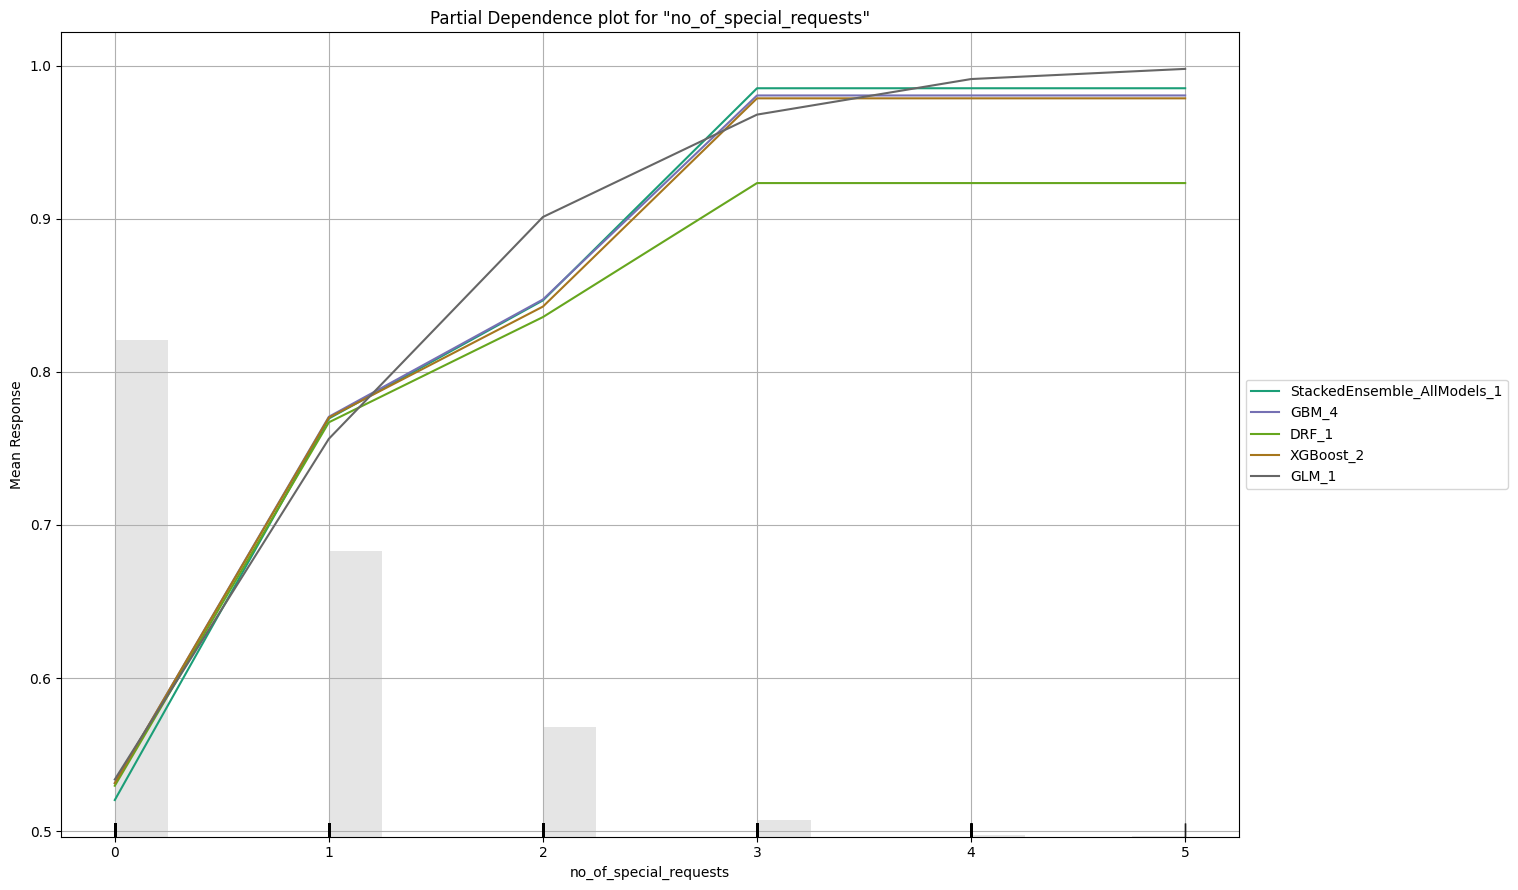

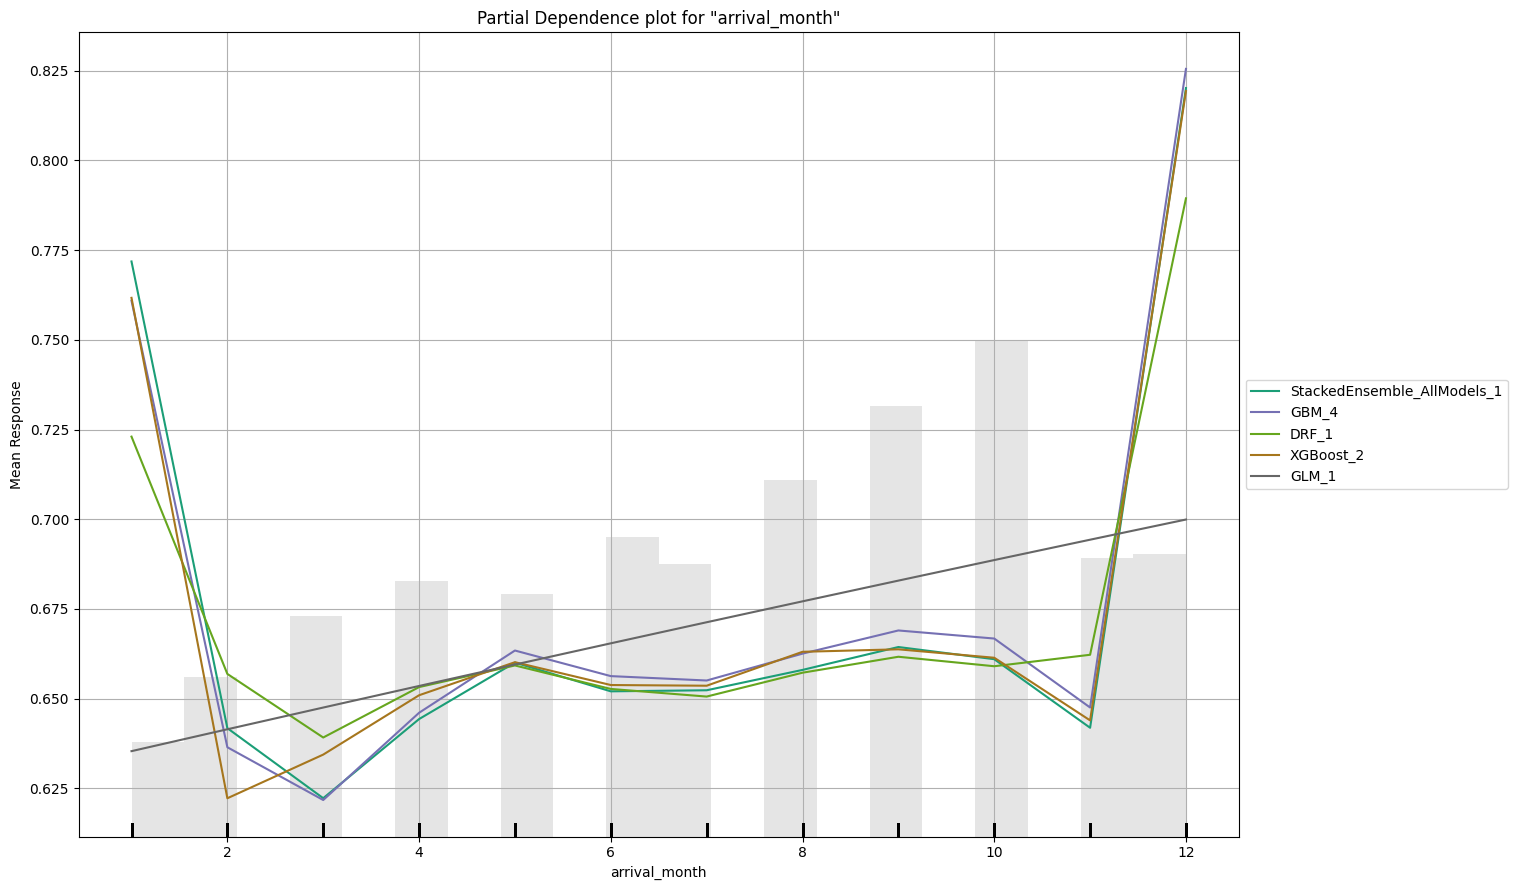

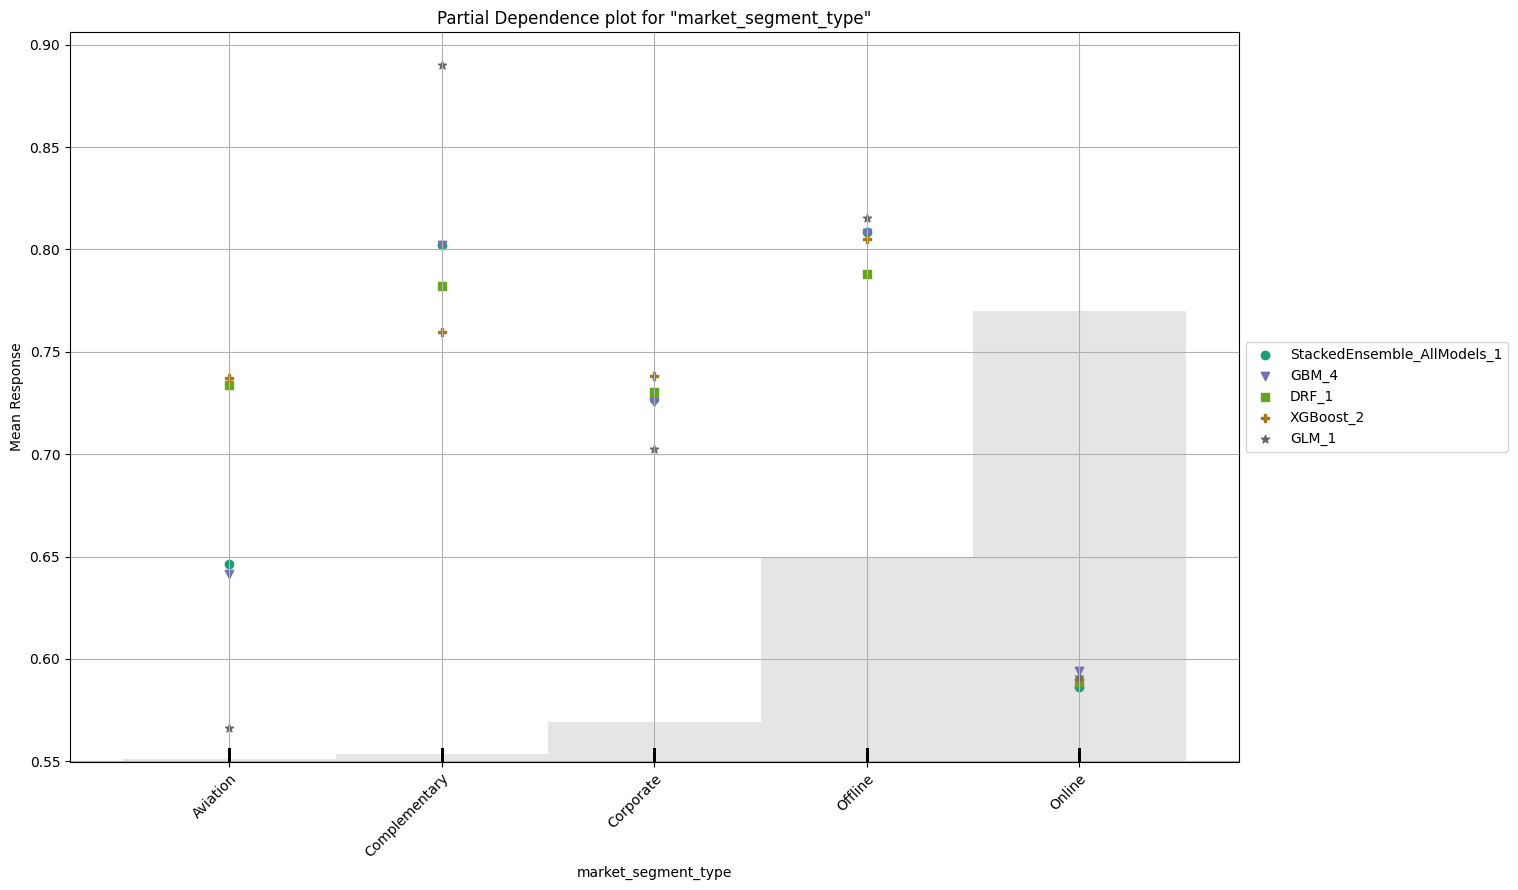

In [77]:
model_explain = aml.explain(data)

### Task 4

Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

In [78]:
! pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 10.1 MB/s eta 0:00:00


In [92]:
numeric_columns, df.columns

(Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'required_car_parking_space', 'lead_time',
        'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests'],
       dtype='object'),
 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
        'no_of_week_nights', 'required_car_parking_space', 'lead_time',
        'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
        'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
        'avg_price_per_room', 'no_of_special_requests', 'booking_status',
        'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
        'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
        'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
        'room_type_reserved_Room_T

# References

1. https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/code
2. https://www.w3schools.com/python/pandas/
3. https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

# Licensing:
MIT License

Copyright (c) 2024 sainikhilreddychalla

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.